In [1]:
# Importing relevant modules
import numpy
import pandas as pd
import matplotlib
%matplotlib inline
from tqdm import tqdm_notebook as tqdm
import sklearn
import sklearn.model_selection
import sklearn.neural_network
import sklearn.ensemble
import sklearn.svm
import sklearn.preprocessing
import sklearn.metrics
import scipy.stats


# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Dataset:
data_url = 'https://raw.githubusercontent.com/Moataz-AbdElKhalek/Concrete_Compressive_Strength_Prediction/main/dataset/Concrete_Dataset_Classification.csv'
dataset = pd.read_csv(data_url)

print(dataset.head(4))

# Descriptive statistics
print("\nDataset has {} rows and {} columns".format(dataset.shape[0],dataset.shape[1]))

print()
y = dataset['y']
print(y.head(4))
print(y.shape)
print()

X = dataset.drop(['y'], axis=1)
print(X.head(4))
print(X.shape)

      X1     X2   X3     X4   X5      X6     X7     X8    y
0  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28.0  1.0
1  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28.0  1.0
2  332.5  142.5  0.0  228.0  0.0   932.0  594.0  270.0  1.0
3  332.5  142.5  0.0  228.0  0.0   932.0  594.0  365.0  1.0

Dataset has 1030 rows and 9 columns

0    1.0
1    1.0
2    1.0
3    1.0
Name: y, dtype: float64
(1030,)

      X1     X2   X3     X4   X5      X6     X7     X8
0  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28.0
1  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28.0
2  332.5  142.5  0.0  228.0  0.0   932.0  594.0  270.0
3  332.5  142.5  0.0  228.0  0.0   932.0  594.0  365.0
(1030, 8)


In [3]:
# Applying statistical Analysis on the data:
dataset.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,y
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,-0.048544
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,0.999306
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,-1.000000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,-1.000000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,-1.000000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,1.000000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,1.000000


# **Data Preprocessing**

In [4]:
# Using Scikit-learn MaxMinScaler: 
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))

# extract attributes and scale data to have Min = -1 and Max = 1 :
cols = X.columns
print('Data Attributes:\n', cols)
print('\nBefore Data Scaling:\n', X.head(4))
sc_X = scaler.fit_transform(X) # Fit scaler to data, then transform data to specified feature_range(-1,1)

# Turn the scaling results back into a dataframe :
sc_X_df = pd.DataFrame(sc_X, columns = cols)
X = sc_X_df
print('\nAfter Data Scaling:\n', X.head(4))

# Applying statistical Analysis on the data:
X.describe()

Data Attributes:
 Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], dtype='object')

Before Data Scaling:
       X1     X2   X3     X4   X5      X6     X7     X8
0  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28.0
1  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28.0
2  332.5  142.5  0.0  228.0  0.0   932.0  594.0  270.0
3  332.5  142.5  0.0  228.0  0.0   932.0  594.0  365.0

After Data Scaling:
          X1        X2   X3        X4       X5        X6       X7        X8
0  1.000000 -1.000000 -1.0 -0.357827 -0.84472  0.389535 -0.58856 -0.851648
1  1.000000 -1.000000 -1.0 -0.357827 -0.84472  0.476744 -0.58856 -0.851648
2  0.052511 -0.207012 -1.0  0.696486 -1.00000 -0.238372 -1.00000  0.478022
3  0.052511 -0.207012 -1.0  0.696486 -1.00000 -0.238372 -1.00000  1.000000


,X1,X2,X3,X4,X5,X6,X7,X8
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,-0.181882,-0.588782,-0.458387,-0.045251,-0.614617,-0.000471,-0.098944,-0.754604
std,0.477198,0.480130,0.639650,0.341122,0.371046,0.452058,0.402288,0.347087
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.587329,-1.000000,-1.000000,-0.311502,-1.000000,-0.238372,-0.312845,-0.967033
50%,-0.219635,-0.877574,-1.000000,0.009585,-0.602484,-0.029070,-0.069242,-0.851648
75%,0.132420,-0.204508,0.182409,0.121406,-0.366460,0.327907,0.154039,-0.697802
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Artificial Neural Network (ANN) Model Optimization**
# Using 10-fold Cross-Validation

In [5]:
def ANN_CV(max_iterations,alpha_range, hidden_layers):
    
  # Preparing the Model:
  model = sklearn.neural_network.MLPClassifier(activation='relu',random_state=1)
  
  # Determining Model Hyperparameters to be tested and optimized:
  paras = {'max_iter':max_iterations, 'alpha':alpha_range, 'hidden_layer_sizes':hidden_layers}

  # Preparing Cross-Validation to be used to fit the Model and the Hyperparameters:
  # Using 10-fold Cross-Validation:
  gridCV = sklearn.model_selection.GridSearchCV(model, paras, cv=10, scoring='accuracy', verbose=10, n_jobs = -1)
  gridCV.fit(X, y)

  best_max_iterations = gridCV.best_params_['max_iter']
  best_alpha = gridCV.best_params_['alpha']
  best_hidden_layers = gridCV.best_params_['hidden_layer_sizes']
  best_score = gridCV.best_score_
  results = gridCV.cv_results_

  return best_max_iterations, best_alpha, best_hidden_layers, best_score, results

In [6]:
# Using the ranges with max score in the case of fixed split: 
test_max_iter_range = numpy.arange(50,1000,200) 
test_alpha_range = [.1, .01, 1e-3, 1e-4 , 1e-5]
layers = []
number_of_layers = 4
number_of_nodes_per_layers = [4, 8, 12]

for n in number_of_nodes_per_layers:
  temp = numpy.array([[n]])
  for m in range(number_of_layers):
    hidden = numpy.repeat(temp, repeats=m+1, axis=1)
    layers.append(hidden[0].tolist())

In [7]:
# Testing the ANN Model using Cross-Validation with Grid Search to determine best score (accuracy) and most optimum Hyperparameters:
best_max_iterations, best_alpha, best_hidden_layers, best_score, results = ANN_CV(test_max_iter_range, test_alpha_range, layers)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

In [15]:
print('best_max_iterations =',best_max_iterations)
print('best_alpha =',best_alpha)
print('best_hidden_layers =', best_hidden_layers)
print('Cross-Validation Mean Best Score for the Model =',best_score)
print('\nCross-Validation Mean Test Scores\n', results['mean_test_score'])

for i in range(10):
  print('\nSplit_'+str(i+1)+' Scores\n',results['split'+str(i)+'_test_score'])
  print('best_score (Split_'+str(i+1)+') =', max(results['split'+str(i)+'_test_score']))

best_max_iterations = 650
best_alpha = 0.01
best_hidden_layers = [12, 12, 12]
Cross-Validation Mean Best Score for the Model = 0.8242718446601941

Cross-Validation Mean Test Scores
 [0.69320388 0.7407767  0.76796117 0.76699029 0.76796117 0.58737864
 0.7815534  0.79805825 0.80776699 0.81941748 0.60582524 0.75533981
 0.78543689 0.79417476 0.79320388 0.65436893 0.8038835  0.81553398
 0.81262136 0.81359223 0.65145631 0.73786408 0.76019417 0.78640777
 0.79417476 0.72427184 0.80194175 0.78737864 0.78932039 0.79126214
 0.6961165  0.80679612 0.79902913 0.79902913 0.79805825 0.68834951
 0.80776699 0.79320388 0.79126214 0.79029126 0.65145631 0.75631068
 0.78446602 0.78932039 0.77572816 0.72135922 0.78543689 0.78252427
 0.80776699 0.81262136 0.73203883 0.81165049 0.81456311 0.80970874
 0.80776699 0.73203883 0.77572816 0.78058252 0.7815534  0.7815534
 0.69320388 0.73883495 0.76893204 0.77087379 0.77281553 0.58640777
 0.77961165 0.80776699 0.8038835  0.80776699 0.60679612 0.75631068
 0.7776699  0.7

# **Data Fixed Single Splitting**
(70% Training and 30% Testing)

In [16]:
# Dividing samples dataset into training and test datasets:
def dataset_divide(X, y):
  X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.70, random_state=1)
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = dataset_divide(X,y)
print(X_train.shape)
print(X_train.head(4))
print(y_train.shape)
print(X_test.shape)
print(X_test.head(4))
print(y_test.shape)

(721, 8)
           X1        X2        X3        X4        X5        X6        X7  \
185 -0.450228 -1.000000 -0.033483  0.078275 -0.720497 -0.034302  0.386352   
286 -0.637443 -1.000000  0.669165 -0.236422 -0.527950  0.480233 -0.077772   
600  0.082192 -1.000000 -1.000000  0.201278 -1.000000 -0.029070 -0.061716   
691 -0.497717 -0.213689 -1.000000  0.305112 -1.000000  0.002326 -0.217260   

           X8  
185 -0.928571  
286 -0.851648  
600 -0.928571  
691 -0.989011  
(721,)
(309, 8)
           X1        X2        X3        X4        X5        X6        X7  \
339 -0.108676 -1.000000  0.174413 -0.153355 -0.409938  0.289535 -0.199699   
244 -0.378539 -1.000000 -0.059470  0.036741 -0.565217 -0.134302  0.269443   
882 -0.826484 -0.259878  0.029485  0.249201 -0.565217 -0.331395 -0.202208   
567 -0.536530 -0.244853 -1.000000  0.020767 -1.000000  0.600000 -0.170597   

           X8  
339 -0.989011  
244 -0.989011  
882 -0.851648  
567 -0.967033  
(309,)


# **Artificial Neural Network (ANN) Final Optimized Model**

In [17]:
# ANN Final Classification Model:
def NN_Classification(X,y, max_iter=650, alpha=0.01, hidden_layer_sizes=[12, 12, 12]):
  model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation='relu',random_state=1, max_iter=max_iter,alpha=alpha)
  model.fit(X, y)

  return model

Score of Model Evaluation with Testing Data = 0.8122977346278317
rmse_test =  0.866492389746542
pcc_test =  0.6256499198640039
scc_test =  0.6256499198640041


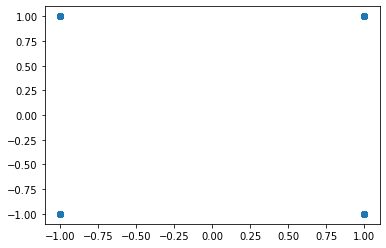

Score of Model Evaluation with Training Data = 0.9306518723994452
rmse_train =  0.5266806531497233
pcc_train =  0.8622728073107463
scc_train =  0.8622728073107465


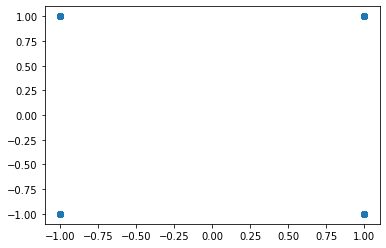

In [18]:
# ANN Classification Model Training:
NN_Model = NN_Classification(X_train, y_train)

# NN Classification Model Evaluation on Testing Data:
current_score = NN_Model.score(X_test,y_test)
y_test_hat = NN_Model.predict(X_test) # testing output

print('Score of Model Evaluation with Testing Data =', current_score)
# RMSE
rmse_test = sklearn.metrics.mean_squared_error(y_test, y_test_hat, squared=False)
print('rmse_test = ',rmse_test)

# Pearson's correlation
pcc_test = scipy.stats.pearsonr(y_test, y_test_hat)[0]
print ('pcc_test = ', pcc_test)

#Spearman's correlation
scc_test = scipy.stats.spearmanr(y_test, y_test_hat)[0]
print ('scc_test = ', scc_test)

matplotlib.pyplot.scatter(y_test,y_test_hat)
matplotlib.pyplot.show()

# NN Classification Model Evaluation on Training Data:
current_score = NN_Model.score(X_train,y_train)
y_train_hat = NN_Model.predict(X_train) # testing output

print('Score of Model Evaluation with Training Data =', current_score)
# RMSE
rmse_train = sklearn.metrics.mean_squared_error(y_train, y_train_hat, squared=False)
print('rmse_train = ',rmse_train)
# Pearson's correlation
pcc_train = scipy.stats.pearsonr(y_train, y_train_hat)[0]
print ('pcc_train = ', pcc_train)

#Spearman's correlation
scc_train = scipy.stats.spearmanr(y_train, y_train_hat)[0]
print ('scc_train = ', scc_train)

matplotlib.pyplot.scatter(y_train,y_train_hat)
matplotlib.pyplot.show()